## BDA scan additional data analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from isn.startup import cat

I Mon-08:25:25.813: **************************************** Bluesky Startup
I Mon-08:25:26.004: Starting Instrument with iconfig: /home/beams43/STAFF19ID/bluesky-mic/src/isn/configs/iconfig.yml



Below are the IPython logging settings for your session.
These settings have no impact on your experiment.

Activating auto-logging. Current session state plus future input saved.
Filename       : /home/beams43/STAFF19ID/bluesky-mic/notebooks/.logs/ipython_log.py
Mode           : rotate
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Exception reporting mode: Plain

End of IPython settings



I Mon-08:25:29.239: **************************************** Bluesky Startup
/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/IPython/core/magics/logging.py:130: UserWarning: Couldn't start log: Log file is already active: /home/beams43/STAFF19ID/bluesky-mic/notebooks/.logs/ipython_log.py
  warn("Couldn't start log: %s" % sys.exc_info()[1])
I Mon-08:25:29.245: Starting Instrument with iconfig: /home/beams43/STAFF19ID/bluesky-mic/src/isn/configs/iconfig.yml
I Mon-08:25:29.247: APS DM environment file: /home/dm_id/etc/dm.setup.sh
I Mon-08:25:29.248: APS DM workflow owner: 19id
I Mon-08:25:29.249: Registered Bluesky IPython magics
I Mon-08:25:29.322: Databroker catalog name: 19id_isn
I Mon-08:25:29.324: using ophyd control layer: 'pyepics'
I Mon-08:25:29.326: RunEngine metadata saved to: .re_md_dict.yml



Below are the IPython logging settings for your session.
These settings have no impact on your experiment.



I Mon-08:25:30.115: Loading device file: /home/beams43/STAFF19ID/bluesky-mic/src/isn/configs/devices.yml
I Mon-08:25:30.440: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/utils/device_utils.py
I Mon-08:25:30.442: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/devices/scan_record.py
I Mon-08:25:30.446: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/devices/save_data.py
I Mon-08:25:30.448: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/utils/writeDetH5.py
I Mon-08:25:30.454: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/devices/xspress3.py
I Mon-08:25:30.460: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/devices/eiger1m.py
I Mon-08:25:30.465: /home/beams43/STAFF19ID/bluesky-mic/src/mic_common/devices/ad_fileplugin.py
I Mon-08:25:31.205: Devices loaded in 1.087 s.
I Mon-08:25:31.210: Adding ophyd device 'xrf_me7' to main namespace
I Mon-08:25:31.212: Adding ophyd device 'samx' to main namespace
I Mon-08:25:31.214: Adding ophyd device 'scan1' to main namespace
I 

<Axes: xlabel='bda_vert_center'>

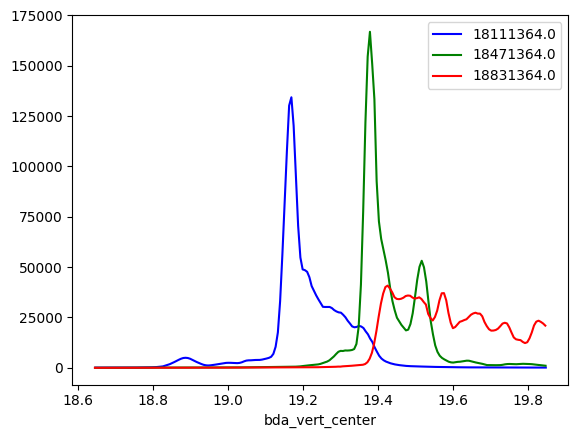

In [28]:
data1 = cat[56].primary.read().to_pandas()
data2 = cat[62].primary.read().to_pandas()
data3 = cat[68].primary.read().to_pandas()
# data4 = cat[61].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(18351364-2*1.2e5), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(18351364+1*1.2e5), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(18351364+4*1.2e5), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(18351364+7*1.2e5), c='orange')

/home/beams/STAFF19ID/.conda/envs/eaa/lib/python3.11/site-packages/databroker/intake_xarray_core/base.py:23: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),


<Axes: xlabel='bda_vert_center'>

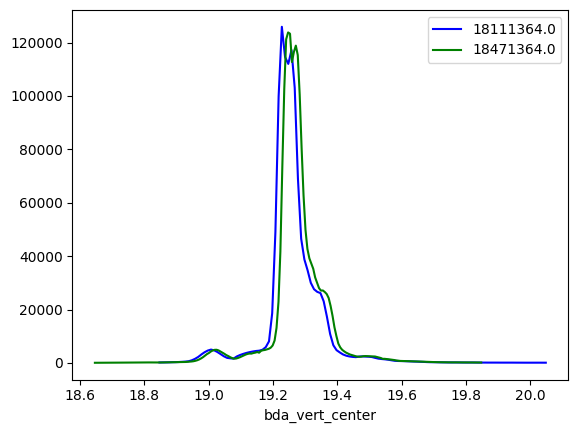

In [21]:
data1 = cat[55].primary.read().to_pandas()
data2 = cat[58].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(18351364-2*1.2e5), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label=str(18351364+1*1.2e5), c='green')

In [41]:
data_prem = cat[80].primary.read().to_pandas()

In [42]:
data_prem.columns

Index(['hhl_mirrors_bender_2', 'hhl_mirrors_bender_2_user_setpoint',
       'hhl_mirrors_bender_1', 'hhl_mirrors_bender_1_user_setpoint',
       'tetramm4_current_1', 'bda_vert_center',
       'bda_vert_center_user_setpoint', 'ring_current'],
      dtype='object')

In [43]:
import xarray as xr

data_prem['norm_current'] = data_prem['tetramm4_current_1']/data_prem['ring_current']

data_array = xr.Dataset.from_dataframe(data_prem.set_index(['bda_vert_center_user_setpoint', 
                                           'hhl_mirrors_bender_1_user_setpoint', 
                                           'hhl_mirrors_bender_2_user_setpoint']))

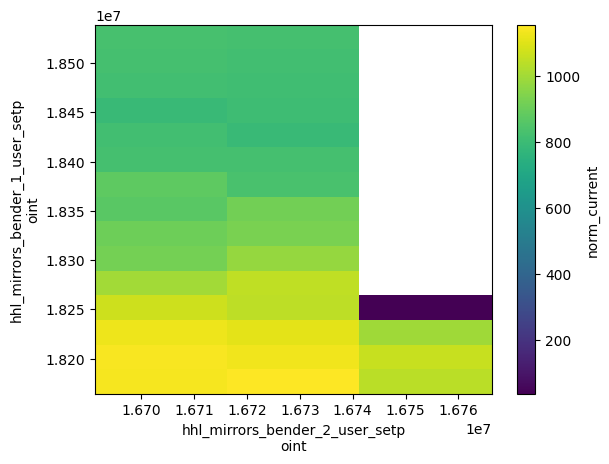

In [44]:
data_array_max = data_array.max(dim='bda_vert_center_user_setpoint')['norm_current']
data_array_max.plot.imshow()

In [19]:
data_array.sizes

Frozen({'bda_vert_center_user_setpoint': 120, 'hhl_mirrors_bender_1_user_setpoint': 5, 'hhl_mirrors_bender_2_user_setpoint': 1})

CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:46589"
    Source File: ../cac.cpp line 1238
    Current Time: Sat Jun 07 2025 19:02:52.810272321
..................................................................
E Sat-19:02:59.325: Motion failed: bda_vert_low_slit is in an alarm state status=14 severity=3
E Sat-19:02:59.327: Motion failed: bda_vert_high_slit is in an alarm state status=14 severity=3
E Sat-19:02:59.330: Motion failed: bda_vert_size is in an alarm state status=14 severity=3
E Sat-19:02:59.333: Motion failed: bda_vert_center is in an alarm state status=14 severity=3
CA.Client.Exception...............................................
    Context: "isnpc05.xray.aps.anl.gov:34579"
    Source File: ../cac.cpp line 1238
    Current Time: Sat Jun 07 2025 19:04:21.854005926
..................................................................
CA.Client.Exception...............................................
    Context: "is

### Bender 1 scans

In [4]:
bender_1_cen = 18351364
bender_2_cen = 16878841

Text(0.5, 0.98, 'Bender 1 scans, fixed Bender 2=16878841')

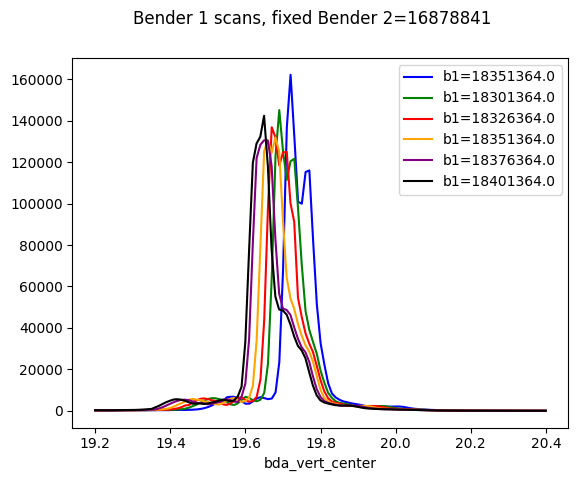

In [18]:
data1 = cat[83].primary.read().to_pandas()
data2 = cat[85].primary.read().to_pandas()
data3 = cat[86].primary.read().to_pandas()
data4 = cat[87].primary.read().to_pandas()
data5 = cat[88].primary.read().to_pandas()
data6 = cat[89].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-0*2.5e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-2*2.5e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-1*2.5e4), c='red')
data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-0*2.5e4), c='orange')
data5.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen+1*2.5e4), c='purple')
data6.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen+2*2.5e4), c='black')

fig.suptitle('Bender 1 scans, fixed Bender 2=16878841')

First, we will test reproducibility

Text(0.5, 0.98, 'Bender 1 scans, fixed Bender 2=16878841')

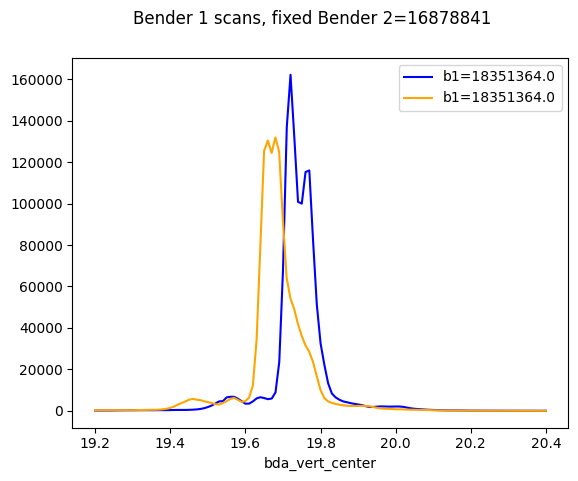

In [19]:
data1 = cat[83].primary.read().to_pandas()
data2 = cat[85].primary.read().to_pandas()
data3 = cat[86].primary.read().to_pandas()
data4 = cat[87].primary.read().to_pandas()
data5 = cat[88].primary.read().to_pandas()
data6 = cat[89].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-0*2.5e4), c='blue')
# data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-2*2.5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-1*2.5e4), c='red')
data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-0*2.5e4), c='orange')
# data5.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen+1*2.5e4), c='purple')
# data6.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen+2*2.5e4), c='black')

fig.suptitle('Bender 1 scans, fixed Bender 2=16878841')

Unfortunately, these look very different between each other

Text(0.5, 0.98, 'Bender 1 scans, fixed Bender 2=16878841')

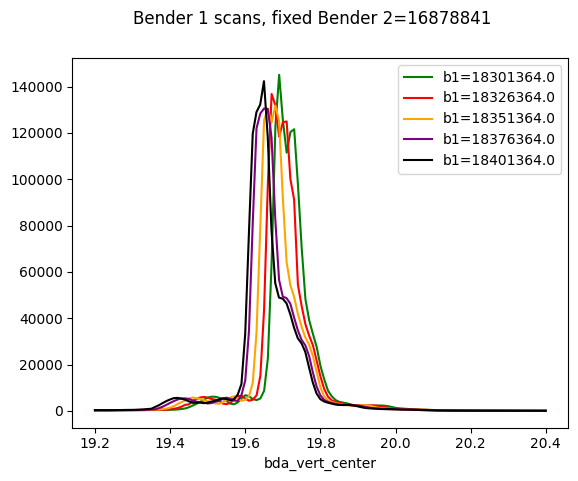

In [20]:
data1 = cat[83].primary.read().to_pandas()
data2 = cat[85].primary.read().to_pandas()
data3 = cat[86].primary.read().to_pandas()
data4 = cat[87].primary.read().to_pandas()
data5 = cat[88].primary.read().to_pandas()
data6 = cat[89].primary.read().to_pandas()

fig, ax = plt.subplots()

# data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-0*2.5e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-2*2.5e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-1*2.5e4), c='red')
data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-0*2.5e4), c='orange')
data5.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen+1*2.5e4), c='purple')
data6.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen+2*2.5e4), c='black')

fig.suptitle('Bender 1 scans, fixed Bender 2=16878841')

It seems that the main effect of increasing bender 1 counts is to narrow the large peak but increase the hump at high bda values.

Text(0.5, 0.98, 'Bender 1 scans, fixed Bender 2=16878841')

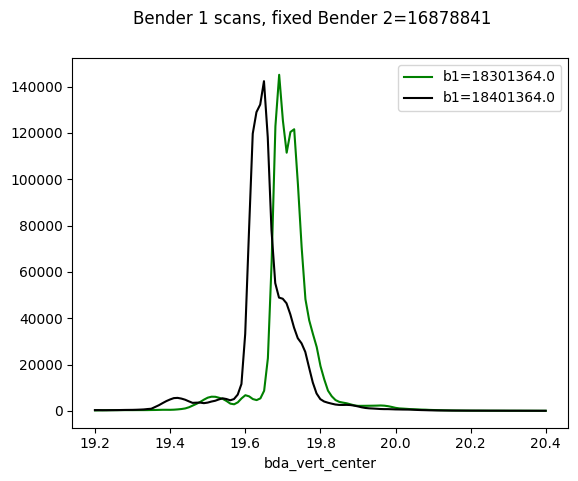

In [21]:
data1 = cat[83].primary.read().to_pandas()
data2 = cat[85].primary.read().to_pandas()
data3 = cat[86].primary.read().to_pandas()
data4 = cat[87].primary.read().to_pandas()
data5 = cat[88].primary.read().to_pandas()
data6 = cat[89].primary.read().to_pandas()

fig, ax = plt.subplots()

# data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-0*2.5e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-2*2.5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-1*2.5e4), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen-0*2.5e4), c='orange')
# data5.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen+1*2.5e4), c='purple')
data6.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen+2*2.5e4), c='black')

fig.suptitle('Bender 1 scans, fixed Bender 2=16878841')

### Bender 2 scans

Now, we try a few bender 2 scans

Text(0.5, 0.98, 'Bender 2 scans, fixed Bender 1=18351364')

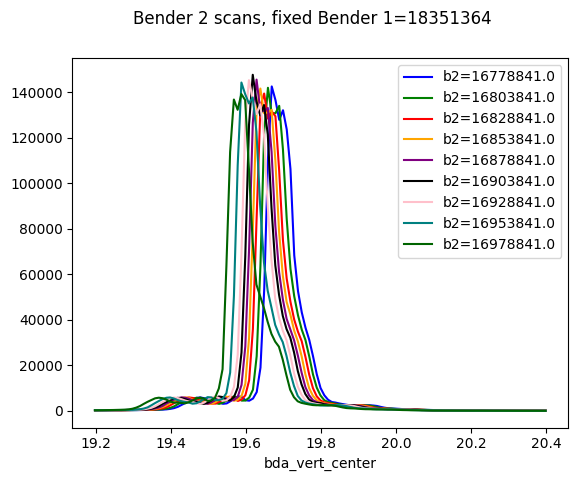

In [23]:
data1 = cat[90].primary.read().to_pandas()
data2 = cat[91].primary.read().to_pandas()
data3 = cat[92].primary.read().to_pandas()
data4 = cat[93].primary.read().to_pandas()
data5 = cat[94].primary.read().to_pandas()
data6 = cat[95].primary.read().to_pandas()
data7 = cat[96].primary.read().to_pandas()
data8 = cat[97].primary.read().to_pandas()
data9 = cat[98].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-4*2.5e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-3*2.5e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-2*2.5e4), c='red')
data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-1*2.5e4), c='orange')
data5.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+0*2.5e4), c='purple')
data6.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+1*2.5e4), c='black')
data7.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+2*2.5e4), c='pink')
data8.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+3*2.5e4), c='teal')
data9.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+4*2.5e4), c='darkgreen')

fig.suptitle('Bender 2 scans, fixed Bender 1='+str(bender_1_cen))

Again we test reproducibility

Text(0.5, 0.98, 'Bender 2 scans, fixed Bender 1=18351364')

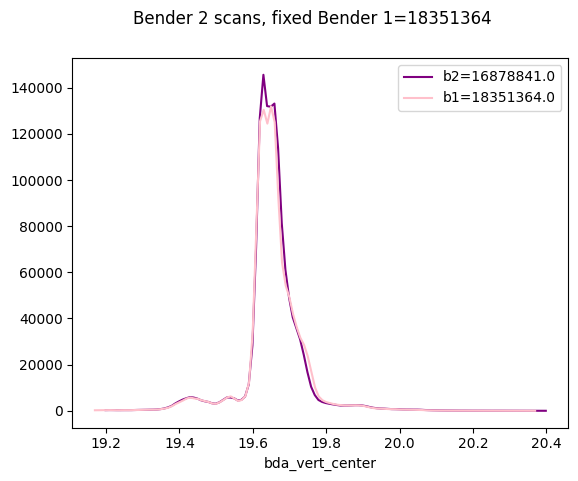

In [ ]:
data1 = cat[90].primary.read().to_pandas()
data2 = cat[91].primary.read().to_pandas()
data3 = cat[92].primary.read().to_pandas()
data4 = cat[93].primary.read().to_pandas()
data5 = cat[94].primary.read().to_pandas()
data6 = cat[95].primary.read().to_pandas()
data7 = cat[96].primary.read().to_pandas()
data8 = cat[97].primary.read().to_pandas()
data9 = cat[98].primary.read().to_pandas()

fig, ax = plt.subplots()

# data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-4*2.5e4), c='blue')
# data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-3*2.5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-2*2.5e4), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-1*2.5e4), c='orange')
data5.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+0*2.5e4), c='purple')
# data6.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+1*2.5e4), c='black')
# data7.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+2*2.5e4), c='pink')
# data8.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+3*2.5e4), c='teal')
# data9.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+4*2.5e4), c='darkgreen')

prev_data4 = cat[87].primary.read().to_pandas() #previous scan on benders' center position for comparison
prev_data4['bda_vert_center'] = prev_data4['bda_vert_center'] - 0.03 #horizontal shift to match the positions
prev_data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b1='+str(bender_1_cen+0*2.5e4), c='pink')

fig.suptitle('Bender 2 scans, fixed Bender 1='+str(bender_1_cen))

We can see that these two are actually very similar, pointing to the fact that the irreproducibility previously observed comes from a different source of instability such as mirror height or other unidentified sources.

Text(0.5, 0.98, 'Bender 2 scans, fixed Bender 1=18351364')

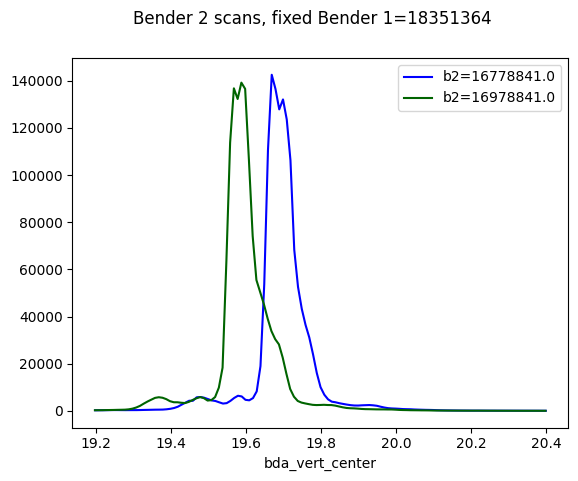

In [31]:
data1 = cat[90].primary.read().to_pandas()
data2 = cat[91].primary.read().to_pandas()
data3 = cat[92].primary.read().to_pandas()
data4 = cat[93].primary.read().to_pandas()
data5 = cat[94].primary.read().to_pandas()
data6 = cat[95].primary.read().to_pandas()
data7 = cat[96].primary.read().to_pandas()
data8 = cat[97].primary.read().to_pandas()
data9 = cat[98].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-4*2.5e4), c='blue')
# data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-3*2.5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-2*2.5e4), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-1*2.5e4), c='orange')
# data5.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+0*2.5e4), c='purple')
# data6.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+1*2.5e4), c='black')
# data7.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+2*2.5e4), c='pink')
# data8.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+3*2.5e4), c='teal')
data9.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+4*2.5e4), c='darkgreen')


fig.suptitle('Bender 2 scans, fixed Bender 1='+str(bender_1_cen))

The observed behavior is somewhat similar as with bender 1, we notice that larger bender values tend to make the central peak narrow at the expense of increasing the hump

Text(0.5, 0.98, 'Bender 2 scans, fixed Bender 1=18351364')

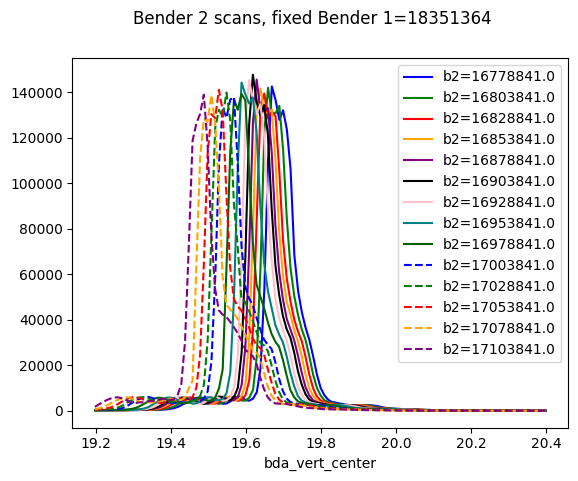

In [35]:
data1 = cat[90].primary.read().to_pandas()
data2 = cat[91].primary.read().to_pandas()
data3 = cat[92].primary.read().to_pandas()
data4 = cat[93].primary.read().to_pandas()
data5 = cat[94].primary.read().to_pandas()
data6 = cat[95].primary.read().to_pandas()
data7 = cat[96].primary.read().to_pandas()
data8 = cat[97].primary.read().to_pandas()
data9 = cat[98].primary.read().to_pandas()
data10 = cat[99].primary.read().to_pandas()
data11 = cat[100].primary.read().to_pandas()
data12 = cat[101].primary.read().to_pandas()
data13 = cat[102].primary.read().to_pandas()
data14 = cat[103].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-4*2.5e4), c='blue')
data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-3*2.5e4), c='green')
data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-2*2.5e4), c='red')
data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-1*2.5e4), c='orange')
data5.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+0*2.5e4), c='purple')
data6.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+1*2.5e4), c='black')
data7.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+2*2.5e4), c='pink')
data8.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+3*2.5e4), c='teal')
data9.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+4*2.5e4), c='darkgreen')
data10.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+5*2.5e4), c='blue', style='--')
data11.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+6*2.5e4), c='green', style='--')
data12.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+7*2.5e4), c='red', style='--')
data13.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+8*2.5e4), c='orange', style='--')
data14.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+9*2.5e4), c='purple', style='--')


fig.suptitle('Bender 2 scans, fixed Bender 1='+str(bender_1_cen))

Text(0.5, 0.98, 'Bender 2 scans, fixed Bender 1=18351364')

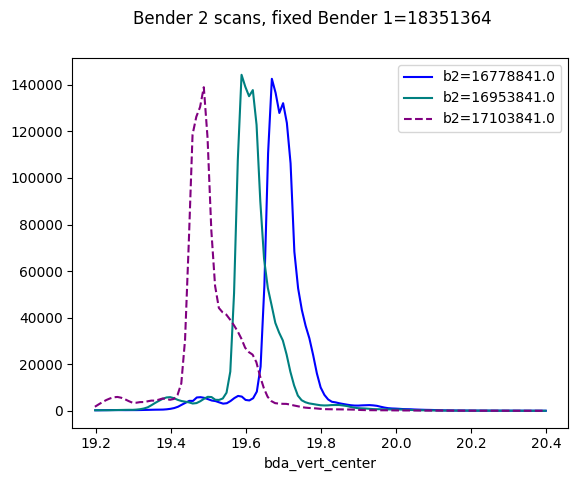

In [36]:
data1 = cat[90].primary.read().to_pandas()
data2 = cat[91].primary.read().to_pandas()
data3 = cat[92].primary.read().to_pandas()
data4 = cat[93].primary.read().to_pandas()
data5 = cat[94].primary.read().to_pandas()
data6 = cat[95].primary.read().to_pandas()
data7 = cat[96].primary.read().to_pandas()
data8 = cat[97].primary.read().to_pandas()
data9 = cat[98].primary.read().to_pandas()
data10 = cat[99].primary.read().to_pandas()
data11 = cat[100].primary.read().to_pandas()
data12 = cat[101].primary.read().to_pandas()
data13 = cat[102].primary.read().to_pandas()
data14 = cat[103].primary.read().to_pandas()

fig, ax = plt.subplots()

data1.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-4*2.5e4), c='blue')
# data2.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-3*2.5e4), c='green')
# data3.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-2*2.5e4), c='red')
# data4.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen-1*2.5e4), c='orange')
# data5.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+0*2.5e4), c='purple')
# data6.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+1*2.5e4), c='black')
# data7.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+2*2.5e4), c='pink')
data8.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+3*2.5e4), c='teal')
# data9.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+4*2.5e4), c='darkgreen')
# data10.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+5*2.5e4), c='blue', style='--')
# data11.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+6*2.5e4), c='green', style='--')
# data12.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+7*2.5e4), c='red', style='--')
# data13.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+8*2.5e4), c='orange', style='--')
data14.plot.line(x='bda_vert_center', y='tetramm4_current_1', ax=ax, label='b2='+str(bender_2_cen+9*2.5e4), c='purple', style='--')


fig.suptitle('Bender 2 scans, fixed Bender 1='+str(bender_1_cen))